In [2]:
!pip install rebound

  Using cached rebound-3.20.0.tar.gz (281 kB)
  Created wheel for rebound: filename=rebound-3.20.0-cp39-cp39-linux_x86_64.whl size=312411 sha256=1e6576cc0c4e10383715a3bf1d852ff31c10178efea5f5728f342c4a3bf45078
  Stored in directory: /mnt/ssd/home/bbonifacio/.cache/pip/wheels/a4/52/1c/a62d92c22bf4bc64111a9744b6aad36efd756e17b1f779b5dc
Successfully built rebound


In [3]:
!pip install spock

  Using cached spock-1.5.2.tar.gz (41.2 MB)
     |████████████████████████████████| 776.4 MB 36 kB/s  eta 0:00:011    |██▎                             | 55.8 MB 11.8 MB/s eta 0:01:02     |██████████████                  | 337.7 MB 12.1 MB/s eta 0:00:37     |████████████████▏               | 391.0 MB 12.2 MB/s eta 0:00:32     |████████████████▋               | 403.8 MB 12.4 MB/s eta 0:00:31     |████████████████▊               | 405.0 MB 12.4 MB/s eta 0:00:31     |██████████████████▎             | 442.2 MB 12.2 MB/s eta 0:00:28     |████████████████████            | 486.7 MB 10.9 MB/s eta 0:00:27     |████████████████████▏           | 490.4 MB 10.3 MB/s eta 0:00:28     |████████████████████▎           | 492.8 MB 10.3 MB/s eta 0:00:28     |████████████████████▍           | 495.8 MB 10.3 MB/s eta 0:00:28     |█████████████████████▎          | 516.2 MB 8.4 MB/s eta 0:00:31     |█████████████████████▌          | 520.5 MB 8.4 MB/s eta 0:00:31     |█████████████████████▋          | 524.3 MB 1

     |████████████████████████████████| 77 kB 4.9 MB/s  eta 0:00:01
     |████████████████████████████████| 151 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 264 kB 11.3 MB/s eta 0:00:01�████████▊       | 204 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 158 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 114 kB 11.4 MB/s eta 0:00:01
  Using cached Theano-1.0.5.tar.gz (2.8 MB)
  Using cached reboundx-3.7.2.tar.gz (85 kB)
  Created wheel for spock: filename=spock-1.5.2-py3-none-any.whl size=31956289 sha256=60c4b997478f4fcb9318b78fee85840cf5817e7b5fc0fbb87736efef33b6eaff
  Stored in directory: /mnt/ssd/home/bbonifacio/.cache/pip/wheels/fd/10/dc/0ea9106672660cb6ab8c6ae5bbe18d535775ca36defe83bff4
  Created wheel for celmech: filename=celmech-1.0.3-cp39-cp39-linux_x86_64.whl size=140197 sha256=3b373801480fdaaa253efd84313a319a84cefeab3f8e53d59ece23e988f1747d
  Stored in directory: /mnt/ssd/home/bbonifacio/.cache/pip/wheels/22/bb/85/ec896

In [2]:
from spock import FeatureClassifier
fmodel = FeatureClassifier()

from spock import NbodyRegressor
nbody = NbodyRegressor()

from spock import DeepRegressor
dmodel = DeepRegressor()

In [4]:
# -*- coding: utf-8 -*-
"""

Planetary Research Project 3
Hello world

"""
from __future__ import print_function
import numpy as np
from warnings import filterwarnings
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import lognorm
import math




   
   

num_iter =100000     #settings["monte_carlo"]["num_iter"]

e_mean = 0.049     #settings["planetary_system"]["mean_e"]
e_error=  0.013     #settings["planetary_system"]["e_error"]

m_mean =  7.7         #Wu 2019 Mass and Mass Scalings of Super Earths
                #Mass distribution should be cautioned - biased towards large planets

                     #settings["planetary_system"]["mean_m"]
m_error =  0.29    #settings["planetary_system"]["m_error"]


#Distribution of period ratios is uniform

a_min = 1.1
a_max = 1.5




e_list = []

a_list = []


m_list = lognorm.rvs(s=m_error, scale=8, size=num_iter) #math.exp(8)
for m in m_list:
    if m < 0:
        m_list.remove(m)

for i in range(num_iter):
    #Generate e using Rayleigh Distribution
    #e_mu = np.random.normal(e_mean)
    e = np.random.rayleigh(scale = e_mean)
    e_list.append(e)
    #Generate a_ratio
    a = np.random.uniform(a_min,a_max)
    a_list.append(a)

density = stats.gaussian_kde(e_list)
n, x, _ = plt.hist(e_list, bins=np.linspace(0, 0.25, 75),
                   histtype=u'step', density=True)  
plt.plot(x, density(x))

plt.title("Eccentricity Distribution Before Spock")
plt.xlabel("Eccentricity")
plt.ylabel("Density")
plt.show()


density = stats.gaussian_kde(m_list)
n, x, _ = plt.hist(m_list,  bins=np.linspace(0, 40, 200),
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.title("Mass Distribution Before Spock")
plt.xlabel("Mass (Earth Masses)")
plt.ylabel("Density")
#plt.xscale("log")
plt.show()


n, x, _ = plt.hist(a_list, bins=np.linspace(1.1,1.5, 4),
                   histtype=u'step', density = False)
plt.plot(x, density(x))
plt.title("Semimajor Axis Ratio Distribution Before Spock")
plt.xlabel("Semimajor Axis Ratio")
plt.ylabel("Density")
plt.show()





In [5]:
#This only needs to be run once
spock_e_list = []
spock_a_list = []
spock_m_list = []
a_weight_array = []
triple_weight_array = []
p_list = []
iter_list = []

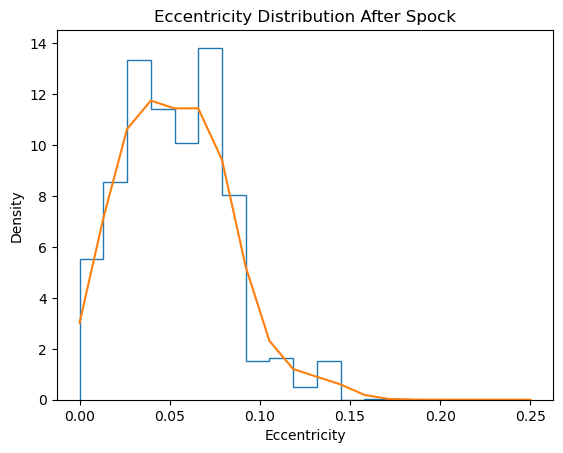

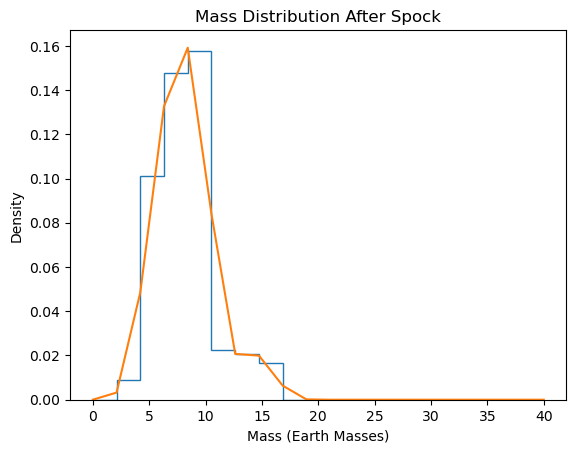

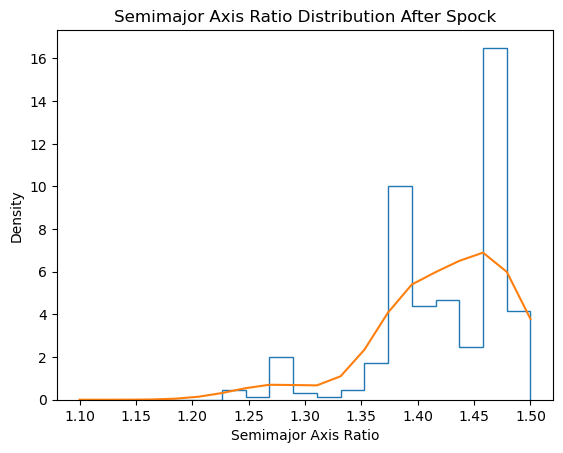

80


In [14]:
#This is where the fun begins


#I can't implement my code until I get out of jupyter notebook - no Syncing!



import rebound
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from spock import FeatureClassifier
fmodel = FeatureClassifier()





cutoff_prob = 0.5

earth_mass = 5.97219*10**24
sun_mass = 1.981 * 10**30

mass_ratio = earth_mass/sun_mass

#Delete after running once
"""
spock_e_list = []
spock_m_list = []
spock_a_list = []
a_weight_array = []
triple_weight_array = []
"""



small_sim_list = []
for i in range(10):
    i = int(np.random.uniform(0,30000))
    temp_e1 = e_list[3*i]
    temp_e2 = e_list[3*i+1]
    temp_e3 = e_list[3*i+2]
               
    temp_m1 = m_list[3*i] 
    temp_m2 = m_list[3*i+1] 
    temp_m3 = m_list[3*i+2] 
    
    temp_a = a_list[int(np.random.uniform(0,num_iter))]
               
    temp_sim = rebound.Simulation()
    temp_sim.add(m=1.)
    #Period ratio squared 
    #20% probability is 20% of total
    #Give it an array with a weight array
    temp_sim.add(m=temp_m1*mass_ratio, P = 1, e = temp_e1)
    temp_sim.add(m=temp_m2*mass_ratio, P = temp_a, e = temp_e2)
    temp_sim.add(m=temp_m3*mass_ratio, P = temp_a**2, e = temp_e3)

    spock_e_list.append(temp_e1)
    spock_e_list.append(temp_e2)
    spock_e_list.append(temp_e3)
    spock_m_list.append(temp_m1)
    spock_m_list.append(temp_m2)
    spock_m_list.append(temp_m3)
    spock_a_list.append(temp_a)  
    
    small_sim_list.append(temp_sim)
    
    

    
small_a_array = fmodel.predict_stable(small_sim_list)

small_triple_array = np.repeat(small_a_array, 3)

a_weight_array = np.concatenate((a_weight_array, small_a_array))
triple_weight_array = np.concatenate((triple_weight_array, small_triple_array))


    
    
density = stats.gaussian_kde(spock_e_list, weights = triple_weight_array)
n, x, _ = plt.hist(spock_e_list, bins=np.linspace(0, 0.25, 20), weights = triple_weight_array,
                   histtype=u'step', density=True)  
plt.plot(x, density(x))

plt.title("Eccentricity Distribution After Spock")
plt.xlabel("Eccentricity")
plt.ylabel("Density")
plt.show()


density = stats.gaussian_kde(spock_m_list, weights = triple_weight_array)
n, x, _ = plt.hist(spock_m_list,bins=np.linspace(0, 40, 20), weights = triple_weight_array,
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.title("Mass Distribution After Spock")
plt.xlabel("Mass (Earth Masses)")
plt.ylabel("Density")
plt.show()


density = stats.gaussian_kde(spock_a_list, weights = a_weight_array)
n, x, _ = plt.hist(spock_a_list, bins=np.linspace(1.1, 1.5, 20), weights = a_weight_array,
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.title("Semimajor Axis Ratio Distribution After Spock")
plt.xlabel("Semimajor Axis Ratio")
plt.ylabel("Density")
plt.show()

print(len(spock_a_list))


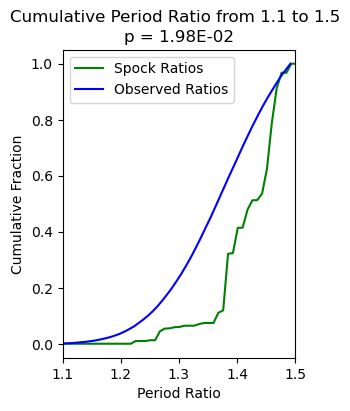

<Figure size 1000x100 with 0 Axes>

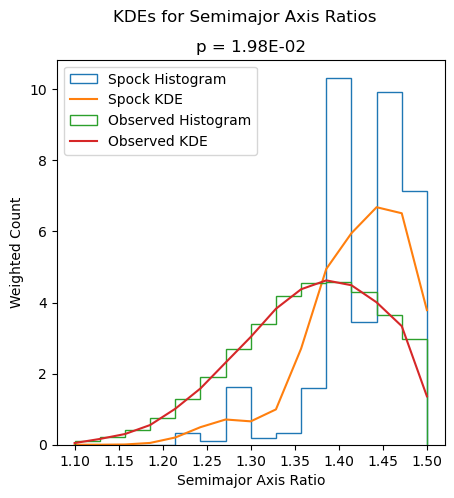

This is performed with 80 Spock Data Points.


In [15]:
import scipy
from decimal import Decimal

values, base = np.histogram(spock_a_list , weights = a_weight_array, bins=np.linspace(1.1, 1.51, 50))

cumulative = np.cumsum(values)
spock_norm_cumulative = cumulative/max(cumulative)

observed_a_list = []
for i in range(100000):
    temp = np.random.normal(1.39,0.1)
    if ((temp > 1.1) and (temp < 1.5)):
        observed_a_list.append(temp)
values, base = np.histogram(observed_a_list, bins=np.linspace(1.1, 1.5, 50))
cumulative = np.cumsum(values)
observed_norm_cumulative = cumulative/max(cumulative)


ksprob = scipy.stats.kstest(spock_norm_cumulative, observed_norm_cumulative, args = (), alternative = 'two-sided', 
                           method = 'exact')

pvalue = ksprob[1]

#Filtering Data




                       
                       
                       
"""
density = stats.gaussian_kde(fa_list)
n, x, _ = plt.hist(fa_list, bins=np.linspace(1.1, 1.5, 10), weights = fa_weight_list,
                   histtype=u'step', density=True)  
plt.plot(x, density(x))
plt.title("Semimajor Axis Ratio Distribution After Spock")
plt.xlabel("Semimajor Axis Ratio")
plt.ylabel("Density")
plt.show()
"""                       
                       
values, base = np.histogram(spock_a_list , weights = a_weight_array, bins=np.linspace(1.1, 1.51, 50))

cumulative = np.cumsum(values)
norm_cumulative = cumulative/max(cumulative)






fig = plt.figure()

fig.set_figheight(4)
fig.set_figwidth(3)

plt.plot(base[:-1], norm_cumulative, c = 'green')


observed_a_list = []
for i in range(100000):
    temp = np.random.normal(1.39,0.1)
    if ((temp > 1.1) and (temp < 1.5)):
        observed_a_list.append(temp)

        
values, base = np.histogram(observed_a_list, bins=np.linspace(1.1, 1.5, 50))

cumulative = np.cumsum(values)
norm_cumulative = cumulative/max(cumulative)

plt.plot(base[:-1], norm_cumulative, c = 'blue')
plt.legend(["Spock Ratios", "Observed Ratios"])

plt.suptitle("Cumulative Period Ratio from 1.1 to 1.5")
plt.title("p = " + '%.2E' % Decimal( str(pvalue)  ))
plt.xlabel("Period Ratio")
plt.ylabel("Cumulative Fraction")
plt.xlim(1.1,1.5)
plt.figure(figsize=(10, 1))
plt.show()
        

        
fig = plt.figure()

fig.set_figheight(5)
fig.set_figwidth(5)

density = stats.gaussian_kde(spock_a_list,weights = a_weight_array)
n, x, _ = plt.hist(spock_a_list, bins=np.linspace(1.1, 1.5, 15), weights = a_weight_array,
                   histtype=u'step', density=True)  
plt.plot(x, density(x))

density = stats.gaussian_kde(observed_a_list)
n, x, _ = plt.hist(observed_a_list, bins=np.linspace(1.1, 1.5, 15),
                   histtype=u'step', density=True) 
plt.plot(x, density(x))

plt.legend(["Spock Histogram", "Spock KDE","Observed Histogram", "Observed KDE"],loc = 'upper left')











plt.suptitle("KDEs for Semimajor Axis Ratios")
plt.title("p = " + '%.2E' % Decimal( str(pvalue)  ))
plt.xlabel("Semimajor Axis Ratio")
plt.ylabel("Weighted Count")
plt.show()


        
        




print("This is performed with " + str(len(spock_a_list)) + " Spock Data Points." )




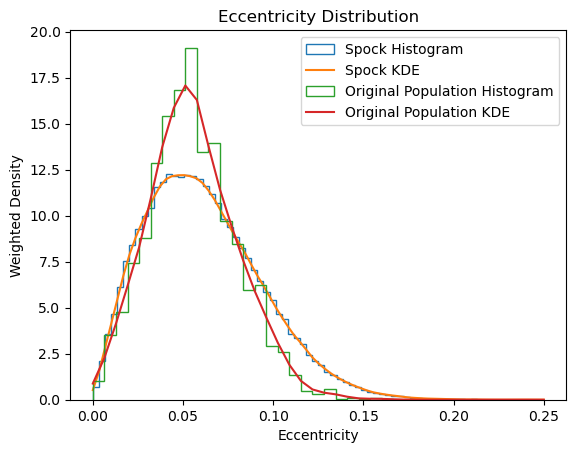

/mnt/ssd/home/bbonifacio/anaconda3/envs/bbonifacio/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


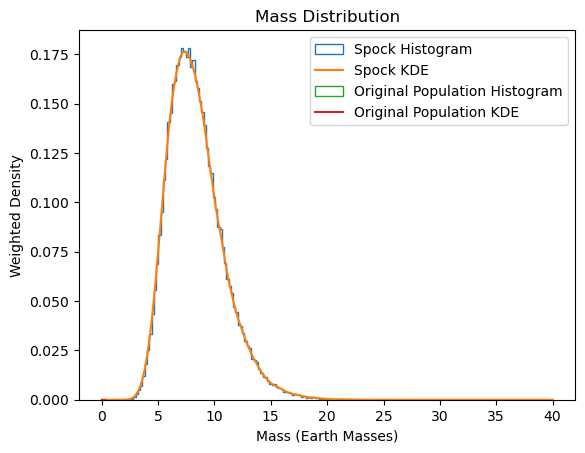

In [13]:



density = stats.gaussian_kde(e_list)
n, x, _ = plt.hist(e_list, bins=np.linspace(0, 0.25, 75),
                   histtype=u'step', density=True)  
plt.plot(x, density(x))


density = stats.gaussian_kde(spock_e_list, weights = triple_weight_array)
n, x, _ = plt.hist(spock_e_list, bins=np.linspace(0, 0.25, 40),
                   histtype=u'step', density=True, weights = triple_weight_array)  
plt.plot(x, density(x))


plt.title("Eccentricity Distribution")
plt.xlabel("Eccentricity")
plt.ylabel("Weighted Density")

plt.legend(["Spock Histogram", "Spock KDE","Original Population Histogram", "Original Population KDE"],loc = 'upper right')

plt.show()


density = stats.gaussian_kde(m_list)
n, x, _ = plt.hist(m_list,  bins=np.linspace(0, 40, 200),
                   histtype=u'step', density=True)  
plt.plot(x, density(x))

density = stats.gaussian_kde(spock_m_list, weights = triple_weight_array)
n, x, _ = plt.hist(spock_m_list, bins=np.linspace(0, 0.25, 75),
                   histtype=u'step', density=True, weights = triple_weight_array)  
plt.plot(x, density(x))

plt.title("Mass Distribution")
plt.xlabel("Mass (Earth Masses)")
plt.ylabel("Weighted Density")
#plt.xscale("log")

plt.legend(["Spock Histogram", "Spock KDE","Original Population Histogram", "Original Population KDE"],loc = 'upper right')

plt.show()



















In [152]:

import scipy


#Here I perform the KSTest



#n, weighted_spock_a_list, _ = plt.hist(spock_a_list, bins=np.linspace(1.1, 1.5, 15), weights = a_weight_array,
#                   histtype=u'step', density=True)  



             





#We can reject the null hypothesis with 95% confidence!!!!!!












